In [1]:
import pandas as pd
import netCDF4 as nc4
import numpy as np
import pathlib as pl
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from PIL import Image
#import cv2
import argparse
import os
from datetime import datetime, timedelta
import glob
import matplotlib.gridspec as gridspec

In [2]:
root = pl.Path(r'Z:\Users\Tyler\projects\forecast\xbeach\deal_island')
out = root / 'temp'
xb = nc4.Dataset(str(root / 'output1' / 'xboutput.nc'))
xb2 = nc4.Dataset(str(root / 'output2' / 'xboutput.nc'))
title = 'Deal Island'

In [17]:

x = xb.variables['globalx'][:,:][0]
x2= xb2.variables['globalx'][:,:][0]
z = xb.variables['zb_mean'][0,:][0]
t = xb.variables['meantime'][:]
zs1 = xb.variables['zs_mean'][:,:][0]
zs2 = xb2.variables['zs_mean'][:,:][0]
h1 = xb.variables['H_mean'][:,:][0]
h2 = xb2.variables['H_mean'][:,:][0]
h2[h2.mask]=np.nan
h1[h1.mask]=np.nan

In [4]:
veg = []
for i in range(0,len(z)):
    if z[i]>0.05:
        veg.append(0.5)
    else:
        veg.append(0)

In [17]:
ii=1
difference = (abs(xb2.variables['H_mean'][ii,:][0]-xb.variables['H_mean'][ii,:][0])/
              (xb2.variables['H_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0])*0.5)

In [12]:
ii=0
xb.variables['zb_mean'][ii,:][0]

masked_array(data=[-1.0501315 , -1.0501315 , -1.0553671 , -1.0497887 ,
                   -1.0423423 , -0.96609189, -0.93306141, -0.90164429,
                   -0.86367775, -0.8088385 , -0.76016985, -0.71613434,
                   -0.6877787 , -0.62605145, -0.57268505, -0.52201978,
                   -0.47062828, -0.40741282, -0.36307905, -0.33251637,
                   -0.31531756, -0.3112188 , -0.31639621, -0.27326791,
                   -0.24590513, -0.23402351, -0.1265583 , -0.00578002,
                    0.12859385,  0.32112024,  0.42907388,  0.41003704,
                    0.49397247,  0.54368809,  0.51099723,  0.47808554,
                    0.42909663,  0.34566273,  0.26848575,  0.20863355,
                    0.19104088,  0.19013332,  0.18760366,  0.15996741,
                    0.14834151,  0.14610105,  0.15568512,  0.17201071,
                    0.19235587,  0.21572524,  0.20476438,  0.17418484,
                    0.17162472,  0.16328614,  0.15133114,  0.16288454,
      

In [28]:
z1 = xb.variables['zb_mean'][:]

In [29]:
z1.shape

(249, 1, 90)

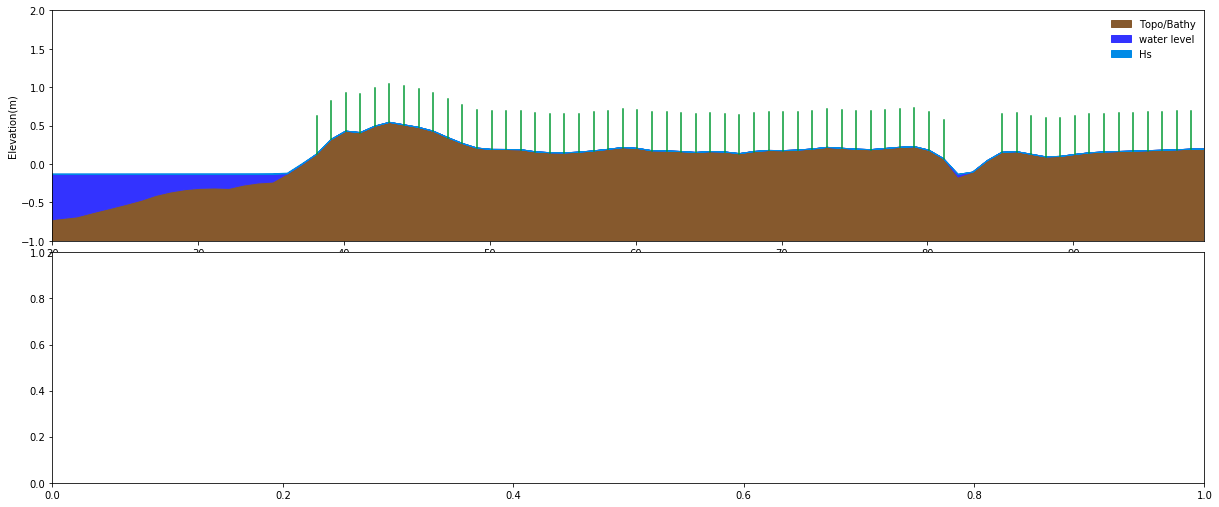

In [32]:
plt.figure(figsize=(16,8))
ax1 = plt.axes([0,.6,1,.4])
ax2 = plt.axes([0,.18,1,.4])
original = ax1.fill_between(x,xb.variables['zb_mean'][ii,:][0],-8,color='#86592d')
for i in range(0,len(veg)):
    vege = ax1.plot((x[i],x[i]),(z1[ii][0][i],z1[ii][0][i]+veg[i]),color='#009933')
water = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],
                         xb.variables['zb_mean'][ii,:][0],color='#3333ff')
waves = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],
                         xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
ax1.set_ylim([-1.5,1.75])
#ax1.set_xlim([1550,2160])
ax1.legend([original,water,waves],['Topo/Bathy','water level','Hs'],frameon=False)
ax1.set_ylabel('Elevation(m)')
ax1.set_xlim([20,99])
ax1.set_ylim([-1,2])
plt.show()

In [34]:

wl = []
for ii in range(0,64):
    plt.figure(figsize=(16,8))
    ax1 = plt.axes([0,.6,1,.4])
    ax2 = plt.axes([0,.18,1,.4])
    ax3 = plt.axes([0,0,1,.15])
    ax1.set_xticks([])
    ax2.set_xticks([])
    file_number = '%05d'%ii
    wl.append('WL{}.png'.format(file_number))
    original = ax1.fill_between(x,xb.variables['zb_mean'][ii,:][0],-8,color='#86592d')
    for i in range(0,len(veg)):
        vege = ax1.plot((x[i],x[i]),(z1[ii][0][i],z1[ii][0][i]+veg[i]),color='#009933')
    water = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],
                             xb.variables['zb_mean'][ii,:][0],color='#3333ff')
    waves = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],
                             xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
    ax1.set_ylim([-1.5,1.75])
    #ax1.set_xlim([1550,2160])
    ax1.legend([original,water,waves],['Topo/Bathy','water level','Hs'],frameon=False)
    ax1.set_ylabel('Elevation(m)')
    ax1.set_xlim([20,99])
    ax1.set_ylim([-1,2])
    ax1.set_title('Deal Island '+str(ii), loc='center')

    ax2.fill_between(x2,xb2.variables['zb_mean'][ii,:][0],-8,color='#86592d')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],
                     xb2.variables['zb_mean'][ii,:][0],color='#3333ff')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],
                     xb2.variables['zs_mean'][ii,:][0]+xb2.variables['H_mean'][ii,:][0],color='#008ae6')    
    ax1.set_ylim([-1,2.25])
    ax1.set_xlim([15,99])
    ax2.set_ylabel('Elevation(m)')
    ax2.set_ylim([-1,2])
    ax2.set_xlim([15,99])
    
    difference = (abs(xb2.variables['H_mean'][ii,:][0]-xb.variables['H_mean'][ii,:][0])/
              (xb2.variables['H_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0])*0.5)
    #difference.fill_value = 0
    #difference[difference.mask]=np.nan
    #percent=ax3.plot(x,difference,color='#cc00cc')
    wave1 = ax3.plot(x,xb.variables['H_mean'][ii,:][0],color='#0066ff')
    wave2 = ax3.plot(x2,xb2.variables['H_mean'][ii,:][0],color='#33cc33')
    ax3.set_xlim([15,99])
    ax3.set_ylim([0.,0.5])
    ax3.set_yticks([0,0.5])
    ax3.legend((r'$H_{s}$ with Vege',r'$H_{s}$ no Vege'),#r'$H_{s}$ Difference',
               frameon=False, loc='upper right',bbox_to_anchor=(1, 0.95))
    ax3.set_ylabel('$H_{s}$ (m)')
    ax3.set_xlabel('cross-section (m)')
    plt.savefig(str('WL{}.png'.format(file_number)),dpi=500,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
images = []
for ii in range(0,len(wl)):
    frames = Image.open(str(wl[ii]))
    images.append(frames)
images[0].save('xbeach_deal.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)  

<div align="middle"><img style="float:center;" src="xbeach_deal.gif" width=900px></div>

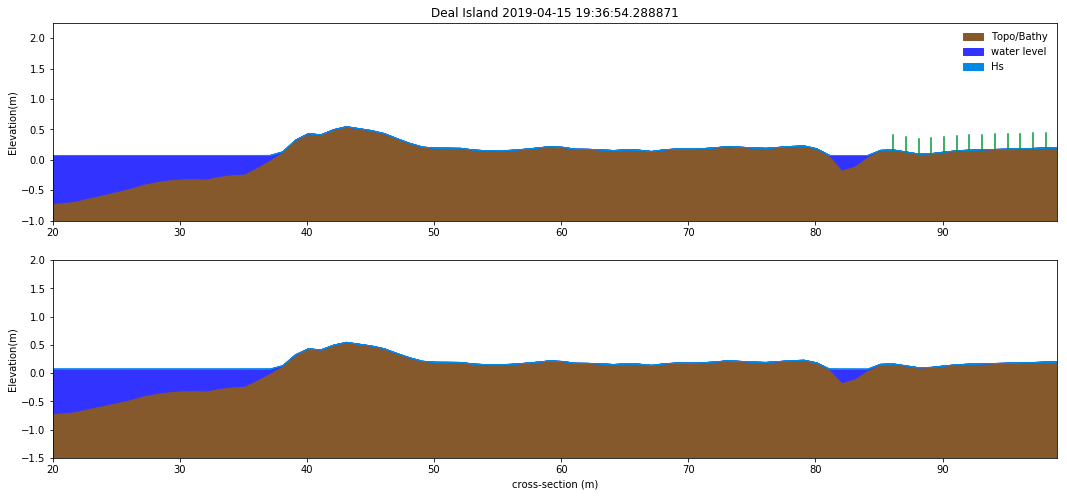

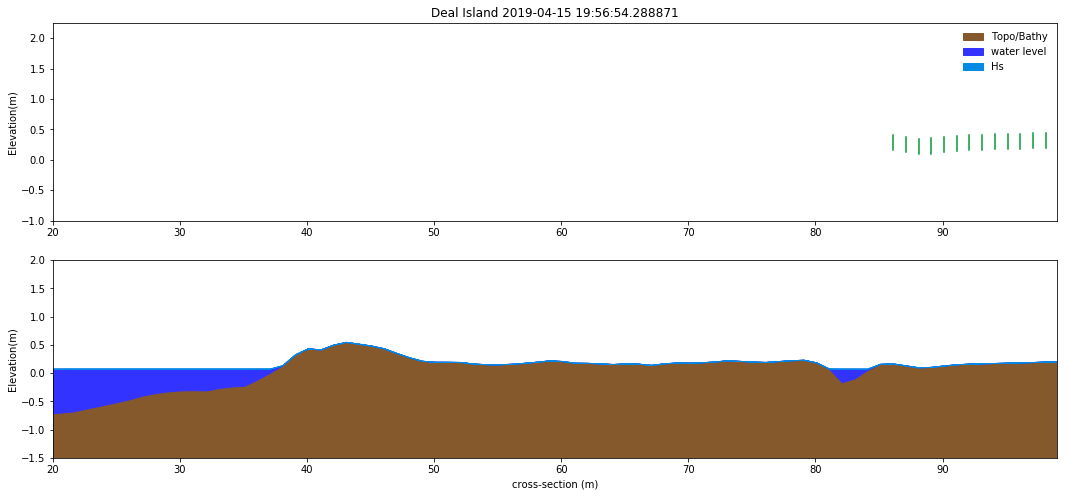

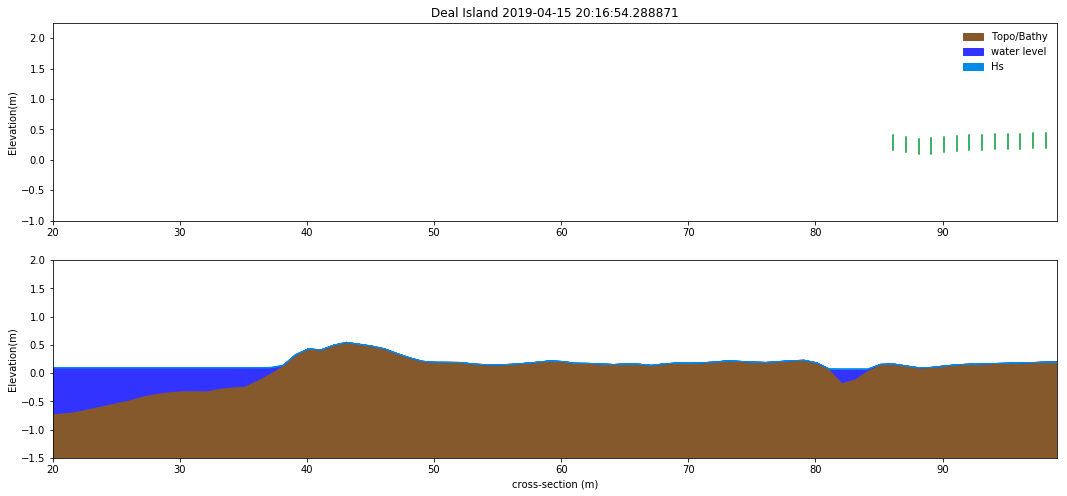

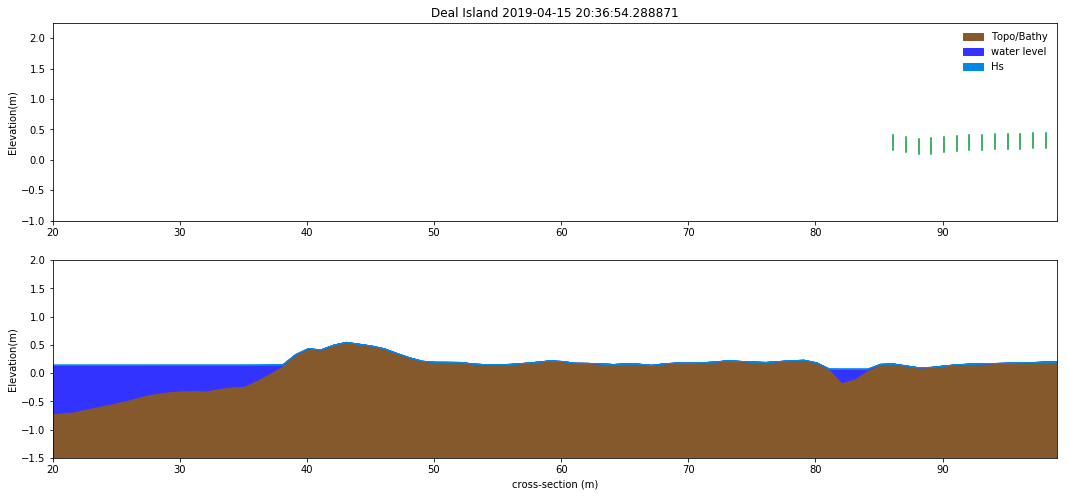

In [23]:

x = xb.variables['globalx'][:,:][0]
x2= xb2.variables['globalx'][:,:][0]
z = xb.variables['zb_mean'][0,:][0]
t = xb.variables['meantime'][:]
veg = []
for i in range(0,len(z)):
    if z[i]>0:
        veg.append(0.25)
    else:
        veg.append(0)
#start_date = datetime.strptime(start,'%Y%m%d%H')
wl = []
start_date = datetime.today()
#start_date = datetime.strptime(start,'%Y%m%d%H')
for ii in range(1,5):#len(t)):
    file_number = '%05d'%ii
    
    plt.subplots(figsize=(18,8))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    original = ax1.fill_between(x,xb.variables['zb_mean'][ii,:][0],-8,color='#86592d')

    for i in range(0,len(veg)):
        if i>75:
            vege = ax1.plot((x[i],x[i]),(z[i],z[i]+veg[i]),color='#009933')
    water = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zb_mean'][ii,:][0],color='#3333ff')
    waves = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
    ax1.set_ylim([-1.5,1.75])
    #ax1.set_xlim([1550,2160])
    ax1.legend([original,water,waves],['Topo/Bathy','water level','Hs'],frameon=False)
    ax1.set_ylabel('Elevation(m)')
    ax1.set_title(title+' {}'.format(start_date + timedelta(minutes=ii*20)))
    ax2.fill_between(x2,xb2.variables['zb_mean'][ii,:][0],-8,color='#86592d')

    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],xb2.variables['zb_mean'][ii,:][0],color='#3333ff')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],xb2.variables['zs_mean'][ii,:][0]+xb2.variables['H_mean'][ii,:][0],color='#008ae6')    
    ax1.set_ylim([-1,2.25])
    ax1.set_xlim([20,99])
    ax2.set_xlabel('cross-section (m)')
    ax2.set_ylabel('Elevation(m)')
    ax2.set_ylim([-1.5,2])
    ax2.set_xlim([20,99])
#    plt.savefig(str(out / 'WL{}.png'.format(file_number)),dpi=500,bbox_inches = 'tight', pad_inches = 0.1)
#    plt.close()


In [22]:
xb2.variables['zb_mean'][ii,:][0]

masked_array(data=[-1.0501315 , -1.0501315 , -1.0553671 , -1.0497887 ,
                   -1.0423423 , -0.96609189, -0.93306141, -0.90164429,
                   -0.86367775, -0.8088385 , -0.76016985, -0.71613434,
                   -0.6877787 , -0.62605145, -0.57268505, -0.52201978,
                   -0.47062828, -0.40741282, -0.36307905, -0.33251637,
                   -0.31531756, -0.3112188 , -0.31639621, -0.27326791,
                   -0.24590513, -0.23402351, -0.1265583 , -0.00578002,
                    0.12859385,  0.32112024,  0.42907388,  0.41003704,
                    0.49397247,  0.54368809,  0.51099723,  0.47808554,
                    0.42909663,  0.34566273,  0.26848575,  0.20863355,
                    0.19104088,  0.19013332,  0.18760366,  0.15996741,
                    0.14834151,  0.14610105,  0.15568512,  0.17201071,
                    0.19235587,  0.21572524,  0.20476438,  0.17418484,
                    0.17162472,  0.16328614,  0.15133114,  0.16288454,
      

In [6]:
wl = glob.glob(str(out / '*.png'))

In [7]:
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save(str(root / 'xbeach.gif'),
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)

In [3]:
#ap = argparse.ArgumentParser()
#ap.add_argument("-ext", "--extension", required=False, default='png', help="extension name. default is 'jpg'.")
#ap.add_argument("-o", "--output", required=False, default='xbeach.mp4', help="output video file")
#args = vars(ap.parse_args())

# Arguments

#ext = args['extension']
#output = args['output']

images = []
for f in os.listdir(out):
    if f.endswith('png'):
        images.append(f)

# Determine the width and height from the first image
image_path = os.path.join(out, images[0])
frame = cv2.imread(image_path)
cv2.imshow('video',frame)
height, width, channels = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
out = cv2.VideoWriter(out, fourcc, 20.0, (width, height))

for image in images:

    image_path = os.path.join(output, image)
    frame = cv2.imread(output)

    out.write(frame) # Write out frame to video

    cv2.imshow('video',frame)
    if (cv2.waitKey(1) & 0xFF) == ord('q'): # Hit `q` to exit
        break

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

TypeError: integer argument expected, got float